<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Pablo Alejandro Rivera Sánchez y Miriam Eunice Rosas Medellín.

**Fecha:** 22 de febrero del 2021.

**Expediente** : 721005 y 721278.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 4: Clase 7
**Link al repositorio en Github**: https://github.com/pabloriverasnz/Tarea4_PRivera_MRosas

## Ejercicio 1

Como ejemplo simple de una simulación de Monte Carlo, considere calcular la probabilidad de una suma particular del lanzamiento de tres dados (cada dado tiene valores del uno al seis). Además cada dado tiene las siguientes carácterísticas: el primer dado no está cargado (distribución uniforme todos son equiprobables); el segundo y tercer dado están cargados basados en una distribución binomial con parámetros (`n = 5, p = 0.5` y `n = 5, p = 0.2`). Calcule la probabilidad de que la suma resultante sea 7, 14 o 18. 

### Solución de Pablo

#### Código

#### Markdown

### Solución de Miriam

#### Código

In [1]:
import numpy as np
import scipy.stats as st
np.random.seed(123)
dado1 = np.random.randint(1, 7, 100000)
dado2 = st.binom(n = 5, p = 0.5, loc = 1).rvs(size = 100000)
dado3 = st.binom(n = 5, p = 0.2, loc = 1).rvs(size = 100000)
suma = dado1 + dado2 + dado3 # arreglo de las sumas de 100,000 (cien mil) tiradas
proba7 = len(suma[suma == 7]) / len(suma)
proba14 = len(suma[suma == 14]) / len(suma)
proba18 = len(suma[suma== 18]) / len(suma)
print("La probabilidad de que la suma sea 7 es " + str(proba7) + ".")
print("La probabilidad de que la suma sea 14 es " + str(proba14) + ".")
print("La probabilidad de que la suma sea 18 es " + str(proba18) + ".")

La probabilidad de que la suma sea 7 es 0.12712.
La probabilidad de que la suma sea 14 es 0.01359.
La probabilidad de que la suma sea 18 es 0.0.


#### Markdown

Si se utiliza la semilla 123 para generar los resultados aleatorios de los dados (el primero con distribución uniforme y los siguientes con distribución binomial), y se tiran 100,000 veces, la probabilidad de las sumas son las siguientes:
1. La probabilidad de que la suma sea 7 es $12.71\%$.
2. La probabilidad de que la suma sea 14 es $1.36\%$.
3. La probabilidad de que la suma sea 18 es $0\%$.

## Ejercicio 2

##### Ejercicio de aplicación - Cafetería Central

Premisas para la simulación:
- Negocio de alimentos que vende bebidas y alimentos.
- Negocio dentro del ITESO.
- Negocio en cafetería central.
- Tipo de clientes (hombres y mujeres).
- Rentabilidad del 60%.

##### Objetivo
Realizar una simulación estimando el tiempo medio que se tardarán los clientes en ser atendidos entre el horario de 6:30 am a 1:30 pm. Además saber el consumo. 
**Analizar supuestos y limitantes**

##### Supuestos en simulación
Clasificación de clientes: 
- Mujer  = 1 $\longrightarrow$ aleatorio < 0.5
- Hombre = 0 $\longrightarrow$ aleatorio $\geq$ 0.5.

Condiciones iniciales:
- Todas las distrubuciones de probabilidad se supondrán uniformes.
- Tiempo de simulación: 6:30 am - 1:30 pm $\longrightarrow$ T = 7 horas = 25200 seg.
- Tiempo de llegada hasta ser atendido: Min = 5 seg., Max = 30 seg.
- Tiempo que tardan los clientes en ser atendidos:
    - Mujer: Min = 1 min. = 60 seg., Max = 5 min. = 300 seg.
    - Hombre: Min = 40 seg. , Max = 2 min. = 120 seg.
- Consumo según el tipo de cliente:
    - Mujer: Min = 30 pesos, Max = 100 pesos
    - Hombre: Min = 20 pesos, Max = 80 pesos

Responder las siguientes preguntas basados en los datos del problema:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en 5 días de trabajo?
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
3. ¿Cuál fue el número de personas atendidas por día?
4. ¿Cuál fue el tiempo de atención promedio?
5. ¿Cuánto fue la ganancia promedio de la cafetería en 5 días de trabajo y su respectiva rentabilidad?

In [2]:
# Datos del problema
d = 5
T = 25200
T_at_min = 5; T_at_max = 30
T_mujer_min = 60; T_mujer_max = 300
T_hombre_min = 40; T_hombre_max = 120
C_mujer_min = 30; C_mujer_max = 100
C_hombre_min = 20; C_hombre_max = 80

### Solución de Pablo

#### Código

#### Markdown

### Solución de Miriam

#### Código

In [3]:
np.random.seed(123) # semilla
escenarios = 1000 # escenarios (en este caso, un escenario será una persona)
personas_d_dias = [np.random.choice([1, 0], escenarios, p = [0.49, 0.51]) for i in range(d)] # 1000 personas por día (default)
C_mujer = st.uniform(loc = C_mujer_min, scale = C_mujer_max - C_mujer_min).rvs(size = [escenarios, d], random_state = 123)
          # distribución uniforme del consumo de las mujeres
C_hombre = st.uniform(loc = C_hombre_min, scale = C_hombre_max - C_hombre_min).rvs(size = [escenarios, d], random_state = 123)
           # distribución uniforme del consumo de los hombres
T_at_mujer_min = T_at_min + T_mujer_min # tiempo mínimo total en el que se atiende a una mujer
T_at_mujer_max = T_at_max + T_mujer_max # tiempo máximo total en el que se atiende a una mujer
T_at_hombre_min = T_at_min + T_hombre_min # tiempo mínimo total en el que se atiende a un hombre
T_at_hombre_max = T_at_max + T_hombre_max # tiempo máximo total en el que se atiende a un hombre
T_mujer = st.uniform(loc = T_at_mujer_min, scale = T_at_mujer_max - T_at_mujer_min).rvs(size = [escenarios, d], 
          random_state = 123) # distribución uniforme del tiempo en el cual se atiende a una mujer
T_hombre = st.uniform(loc = T_at_hombre_min, scale = T_at_hombre_max - T_at_hombre_min).rvs(size = [escenarios, d],
           random_state = 123) # distribución unidorme del tiempo en el cual se atiende a un hombre
tiempos = [[T_hombre.T[i][n] if personas_d_dias[i][n] == 0 else T_mujer.T[i][n] for n in range(escenarios)] for i in range(d)]
          # tiempo en el cual cada una de las 1000 personas es atendida conforme llega, para los 5 días
binary_personas = [["person" if np.array(tiempos)[i].cumsum()[n] <= T else None for i in range(d)] for n in range(escenarios)]
                  # se agrega "person" si dicha persona alcanza a ser atendida dentro del límite de tiempo

In [4]:
num_personas = [list(np.array(binary_personas).T[i]).count("person") for i in range(d)]
print("La cantidad de personas atendidas (hombre o mujer) en cada uno de los días son las siguientes", num_personas)
dia1 = personas_d_dias[0][:num_personas[0]] # personas atendidas en el día 1 (con 0s y 1s), ya tomando en cuenta el tiempo
dia2 = personas_d_dias[1][:num_personas[1]] # personas atendidas en el día 2 (con 0s y 1s), ya tomando en cuenta el tiempo
dia3 = personas_d_dias[2][:num_personas[2]] # personas atendidas en el día 3 (con 0s y 1s), ya tomando en cuenta el tiempo
dia4 = personas_d_dias[3][:num_personas[3]] # personas atendidas en el día 4 (con 0s y 1s), ya tomando en cuenta el tiempo
dia5 = personas_d_dias[4][:num_personas[4]] # personas atendidas en el día 5 (con 0s y 1s), ya tomando en cuenta el tiempo
dias = [dia1, dia2, dia3, dia4, dia5] # lista de litas de las personas atendidas por día
tiempos2 = [[T_hombre.T[i][n] if dias[i][n] == 0 else T_mujer.T[i][n] for n in range(num_personas[i])] for i in range(d)]
           # tiempo en el cual cada una de las personas es atendida conforme llega (ya tomando en cuenta cuales alcanzan)
tiempo_prom = np.array(list(map(lambda x: np.array(x).mean(), tiempos2))).mean()
              # primero calculo el promedio por día, y luego saco el promedio de todos los días
print("El tiempo de atención promedio (tanto para hombres como mujeres) de los 5 días fue de " + str(tiempo_prom) + 
      " seg. por persona.")

La cantidad de personas atendidas (hombre o mujer) en cada uno de los días son las siguientes [179, 171, 166, 162, 176]
El tiempo de atención promedio (tanto para hombres como mujeres) de los 5 días fue de 147.42764970887256 seg. por persona.


In [5]:
consumos = [[C_hombre.T[i][n] if dias[i][n] == 0 else C_mujer.T[i][n] for n in range(num_personas[i])] for i in range(d)]
           # consumo de cada una de las personas que alcanzaron a ser atendidas en cada uno de los 5 días
cons_muj_con_cero = np.array(dias, dtype = object) * np.array(consumos, dtype = object) 
                    # únicamente el consumo de las mujeres para poder sacar el promedio (el de los hombres se muestra como 0)
cons_muj_con_nan = [[cons_muj_con_cero[i][n] if cons_muj_con_cero[i][n] != 0 else np.nan for n in range(num_personas[i])] 
                    for i in range(d)] # convierto el consumo de los hombres a np.nan para ignorarlo al sacar la media
cons_prom_muj = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].mean(), cons_muj_con_nan))).mean()
print("El consumo promedio de las mujeres en los 5 días sería de " + str(cons_prom_muj) + " pesos diarios.")
cons_suma_muj = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].sum(), cons_muj_con_nan))).sum()
                # lo que sería equivalente a todos los ingresos que vienen de las mujeres
print("El consumo total acumulado de todas las mujeres en los 5 días sería de " + str(cons_suma_muj) + " pesos.")
dias_al_reves = [np.array([0 if dias[i][n] == 1 else 1 for n in range(num_personas[i])]) for i in range(d)]
              # switchear las mujeres por los hombres para poder ponerle "1" a los hombres y multiplicar correctamente
cons_hom_con_cero = np.array(dias_al_reves, dtype = object) * np.array(consumos, dtype = object) 
                    # únicamente el consumo de los hombres para poder sacar el promedio (el de las mujeres se muestra como 0)
cons_hom_con_nan = [[cons_hom_con_cero[i][n] if cons_hom_con_cero[i][n] != 0 else np.nan for n in range(num_personas[i])] 
                    for i in range(d)] # convierto el consumo de las mujeres a np.nan para ignorarlo al sacar la media
cons_prom_hom = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].mean(), cons_hom_con_nan))).mean()
print("El consumo promedio de los hombres en los 5 días sería de " + str(cons_prom_hom) + " pesos diarios.")
cons_suma_hom = np.array(list(map(lambda x: np.array(x)[~ np.isnan(x)].sum(), cons_hom_con_nan))).sum()
                # lo que sería equivalente a todos los ingresos que vienen de los hombres
print("El consumo total acumulado de todas los hombres en los 5 días sería de " + str(cons_suma_hom) + " pesos.")

El consumo promedio de las mujeres en los 5 días sería de 65.28040804222753 pesos diarios.
El consumo total acumulado de todas las mujeres en los 5 días sería de 27233.260603210292 pesos.
El consumo promedio de los hombres en los 5 días sería de 50.71432849038489 pesos diarios.
El consumo total acumulado de todas los hombres en los 5 días sería de 22045.26148487703 pesos.


In [6]:
ingreso_prom = np.array(list(map(lambda x: np.array(x).sum(), consumos))).mean()
               # primero calculo los ingresos por día, y luego saco el promedio de todos esos ingresos
print("El ingreso promedio de la cafetería en los 5 días sería de " + str(ingreso_prom) + " pesos diarios.")
print("Con una rentabilidad del 60%, la rentabilidad promedio de esos 5 días sería de " + str(ingreso_prom * 0.6) + 
      " pesos diarios.")

El ingreso promedio de la cafetería en los 5 días sería de 9855.704417617464 pesos diarios.
Con una rentabilidad del 60%, la rentabilidad promedio de esos 5 días sería de 5913.422650570478 pesos diarios.


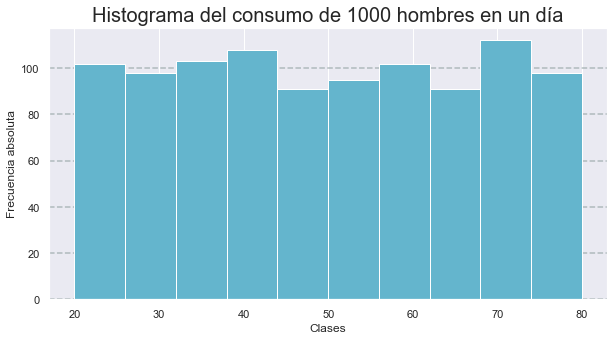

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.figure(figsize = (10, 5))
plt.hist(C_hombre.T[4], bins = (1 + int(np.log2(len(C_hombre.T[4])))), color = "c") # en el día 5
         # regla de Sturges para sacar el número de clases óptimo
plt.xlabel("Clases", fontsize = 12)
plt.ylabel("Frecuencia absoluta", fontsize = 12)
plt.title("Histograma del consumo de 1000 hombres en un día", fontsize = 20)
plt.grid(color = "#95a5a6", linestyle='--', linewidth = 1.5, axis = "y", alpha = 0.7)
plt.show() 
# la gráfica demuestra que sí es una distribución uniforme, se podría hacer 
# con cualquier otra distribución desarrollada en este ejercicio

#### Markdown

Los **pasos** para resolver este ejercicio fueron los siguientes: 
- Primero **se desarrollaron las distribuciones uniformes** correspondientes al consumo de cada uno de los géneros y al tiempo en que estos fueron atendidos. 
- Después, **se creó una fila de $1000$ (escenarios) mujeres y hombres** generada aleatoriamente con las probabilidades proporcionadas (hay $49\%$ de probabilidad de que la persona sea mujer y $51\%$ de que sea hombre). 
- **Cada fila se generó 5 veces**, pues es la fecha futura para la cual se debía de hacer la simulación. 
- Después de eso, **se calculó cuántas personas**, de las que estaban formadas, **alcanzaría a atender la cafetería** antes de cerrar sus puertas. 
- A estas filas reducidas conformadas únicamente de las personas que alcanzarían a ser atendidas, **se les aplicó finalmente la distribución uniforme** dependiendo de si la persona que seguía de atender era hombre y mujer.
- Finalmente, **se hicieron los cálculos** correspondientes dependiendo de si se preguntaba algo relacionado con el consumo o con el tiempo en ser atendidos; y tanto si se trataba de un estadístico por día (ej., el promedio de atención en cada uno de los cinco días, que regresa un array-like), o uno global (ej., el promedio de atención diario para los 5 días, que regresa un integer).

Todas las **preguntas** concretas planteadas en el ejercicio se respondieron con unos `print()` en el código anterior, pero igualmente se responden a continuación:
1. ¿Cuáles fueron los gastos de los hombres y las mujeres en $5$ días de trabajo?
```
El consumo total acumulado de todas las mujeres en los 5 días sería de 27233.260603210292 pesos.
```
```
El consumo total acumulado de todas los hombres en los 5 días sería de 22045.26148487703 pesos.
```
2. ¿Cuál fue el consumo promedio de los hombres y mujeres?
```
El consumo promedio de las mujeres en los 5 días sería de 65.28040804222753 pesos diarios.
```
```
El consumo promedio de los hombres en los 5 días sería de 50.71432849038489 pesos diarios.
```
3. ¿Cuál fue el número de personas atendidas por día?
```
La cantidad de personas atendidas (hombre o mujer) en cada uno de los días son las siguientes [179, 171, 166, 162, 176]
```
4. ¿Cuál fue el tiempo de atención promedio?
```
El tiempo de atención promedio (tanto para hombres como mujeres) de los 5 días fue de 147.42764970887256 seg. por persona.
```
5. ¿Cuánto fue la ganancia promedio de la cafetería en $5$ días de trabajo y su respectiva rentabilidad?
```
El ingreso promedio de la cafetería en los 5 días sería de 9855.704417617464 pesos diarios.
```
```
Con una rentabilidad del 60%, la rentabilidad promedio de esos 5 días sería de 5913.422650570478 pesos diarios.
```

De manera extra, se realizó un **histograma** del consumo de $1000$ (escenarios) hombres por $5$ días, es decir, $5000$ hombres en total, el cual desmostró que esta distribución uniforme y también presuntamente todas las demás desarrolladas en este ejercicio, en efecto tienen una **distribución uniforme**.
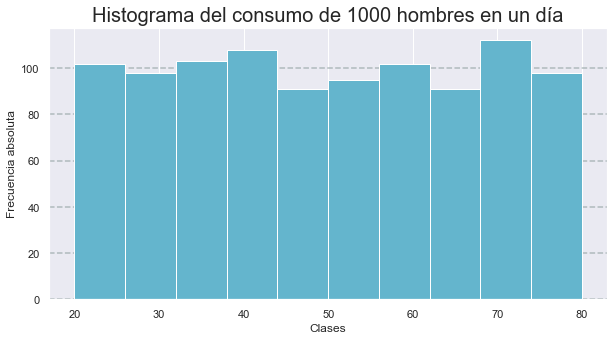